# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Dataframe 생성

In [3]:
train_df = pd.read_csv('./dataset/train/train.csv')

In [4]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


#### 데이터셋 총 개수: 32470개
#### 결측값 없음

In [6]:
print(train_df['sentence'][0])
print(train_df['subject_entity'][0])
print(train_df['object_entity'][0])


〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}


## 1- 필요한 것 추가

In [7]:
# no relation/per/org 나누기
type_sep = [
    (train_df['label']=='no_relation'),
    (train_df['label'].str.startswith('p')),
    (train_df['label'].str.startswith('o'))
]
type_sep_list = ['no_relation', 'per','org']

train_df['type'] = np.select(type_sep, type_sep_list,default = None)

In [8]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source,type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,org
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,org
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,no_relation


In [9]:
# sub_entity type
type_sep = [
    (train_df['subject_entity'].str.endswith('G\'}')),
    (train_df['subject_entity'].str.endswith('R\'}'))
]  
type_sep_list = ['org', 'per']

train_df['sub_type'] = np.select(type_sep, type_sep_list,default = None)

In [10]:
# object_entity type
type_sep = [
    (train_df['object_entity'].str.endswith('PER\'}')),
    (train_df['object_entity'].str.endswith('LOC\'}')),
    (train_df['object_entity'].str.endswith('POH\'}')),
    (train_df['object_entity'].str.endswith('DAT\'}')),
    (train_df['object_entity'].str.endswith('NOH\'}')),
    (train_df['object_entity'].str.endswith('ORG\'}'))
]  
type_sep_list = ['per','loc','poh','dat','noh','org']

train_df['object_type'] = np.select(type_sep, type_sep_list,default = None)

In [11]:
train_df['entity'] = train_df['sub_type'] +':'+ train_df['object_type']

In [12]:
train_df

,id,sentence,subject_entity,object_entity,label,source,type,sub_type,object_type,entity
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,no_relation,org,per,org:per
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,no_relation,org,org,org:org
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,org,org,org,org:org
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,org,org,per,org:per
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,no_relation,org,dat,org:dat
...,...,...,...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,per,per,loc,per:loc
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia,per,per,per,per:per
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree,org,org,per,org:per
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia,no_relation,org,org,org:org


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
 6   type            32470 non-null  object
 7   sub_type        32470 non-null  object
 8   object_type     32470 non-null  object
 9   entity          32470 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


# 2. Class분포 확인

## 2-1 전체 data

In [14]:
train_df.label.unique().shape

(30,)

In [17]:
print(f'values: {train_df.label.value_counts()}')

values: no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product             

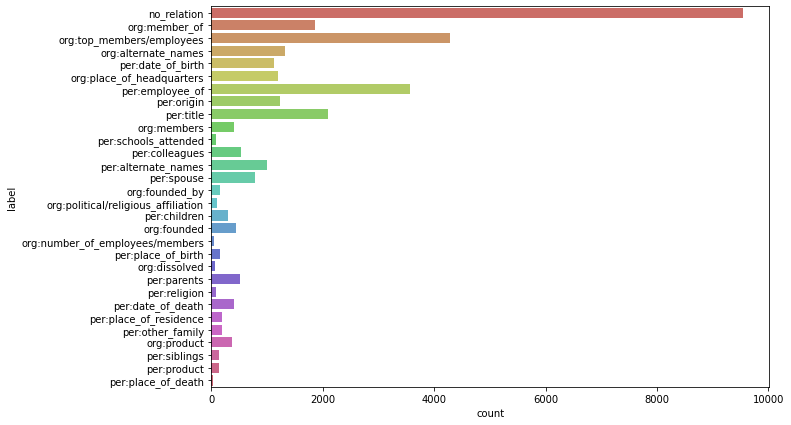

In [16]:
fig = plt.subplots(figsize=(10,7))
sns.countplot(y='label', data=train_df, palette='hls');

## 2-2 org, hls 마다 확인

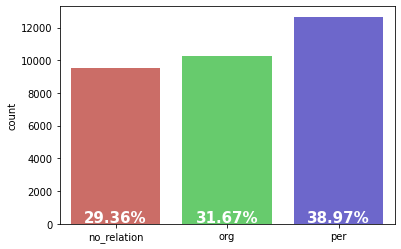

In [16]:
ax = sns.countplot(data=train_df,x = 'type', palette='hls')
plt.xlabel('')

# % 나타내기
counts = train_df.type.value_counts()
counts[0],counts[1], counts[2]=counts[2],counts[1], counts[0]
counts_pct = [f'{pct*100:.2f}%' for pct in counts/counts.sum()]
for idx, value in enumerate(counts_pct):
    ax.text(idx, 100, value, ha='center', size=15, color='w', fontweight='bold');

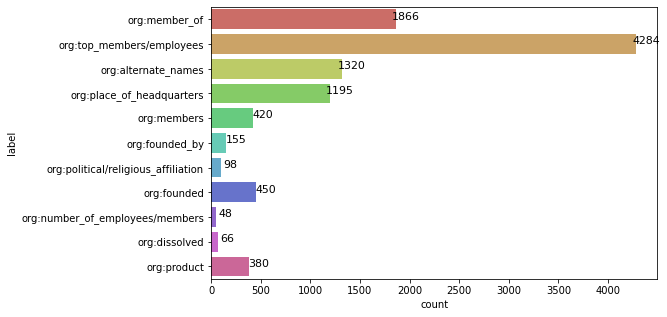

In [17]:
countplt, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(y='label', data=train_df[train_df['type']=='org'], palette='hls');

for rect in ax.patches:
    ax.text (rect.get_width()+100,rect.get_y() + rect.get_height()/2,rect.get_width(),horizontalalignment='center', fontsize = 11)
    #ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

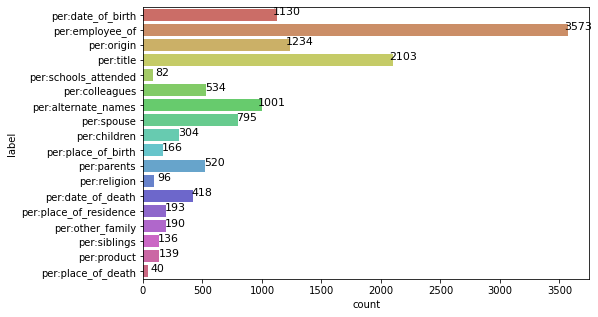

In [18]:
countplt, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(y='label', data=train_df[train_df['type']=='per'], palette='hls');

for rect in ax.patches:
    ax.text (rect.get_width()+80,rect.get_y() + rect.get_height()/2,rect.get_width(),horizontalalignment='center', fontsize = 11)

## 2-3 entity별 확인

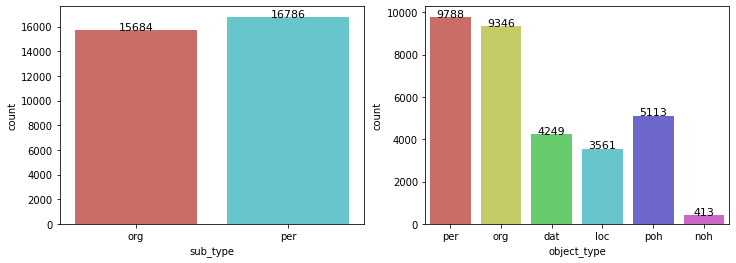

In [19]:
countplt,ax = plt.subplots(figsize=(12,4),ncols = 2)
ax = sns.countplot(x='sub_type', data=train_df, palette='hls',ax=ax[0]);
ax2 = sns.countplot(x='object_type', data=train_df, palette='hls');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

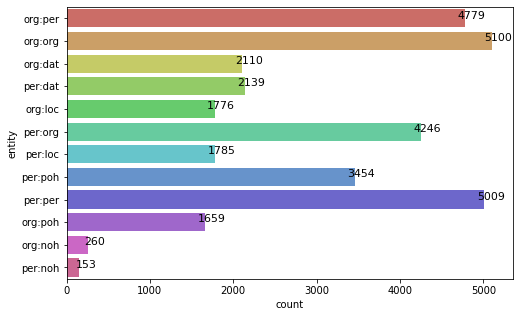

In [20]:
countplt,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(y='entity', data=train_df, palette='hls');


for rect in ax.patches:
    ax.text (rect.get_width()+80,rect.get_y() + rect.get_height()/2,rect.get_width(),horizontalalignment='center', fontsize = 11)

## 2-4 entity별 - class확인

In [21]:
def drawplot(r,c,entity):
    ax[r][c].set_title(entity)
    ax1 = sns.countplot(y='label', data=train_df[train_df['entity'] == entity], palette='hls',ax=ax[r][c]);
    for rect in ax1.patches:
        ax1.text (rect.get_width()+10,rect.get_y() + rect.get_height()/2,rect.get_width(),horizontalalignment='center', fontsize = 11)
    

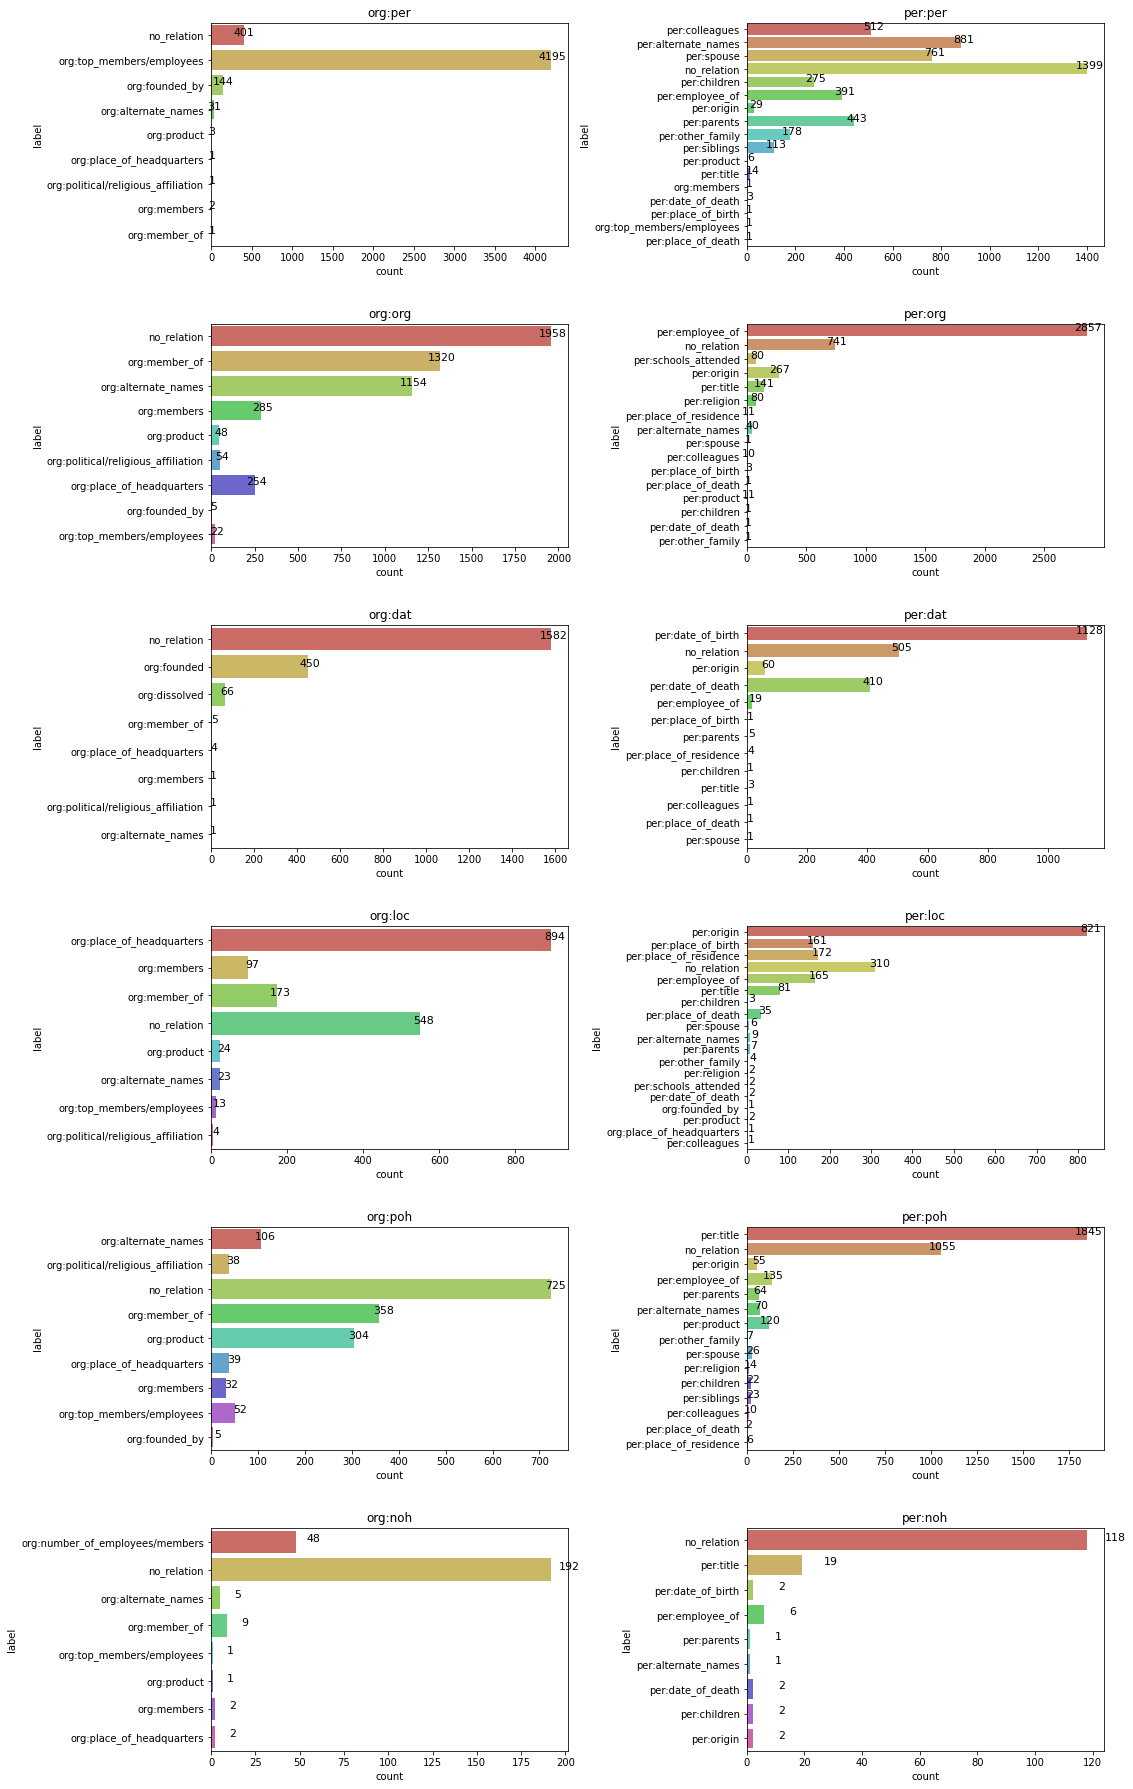

In [22]:
countplt,ax = plt.subplots(figsize=(16,30),nrows=6,ncols=2)
sub = ['org','per']
obj = ['per','org','dat','loc','poh','noh']
for c in range(2):
    for r in range(6):
        drawplot(r,c,sub[c]+':'+obj[r])

# padding
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)



## 궁금한 점
- 왜 start_idx와 end_idx를 줬을까? 

In [26]:
train_df[(train_df['entity']=='org:per') & (train_df['label'] == 'org:product')]

,id,sentence,subject_entity,object_entity,label,source,type,sub_type,object_type,entity
2239,2239,엔씨소프트의 캐릭터 브랜드 투턱곰이 그룹 몬스타엑스와 함께 신규 콜라보 웹예능 ‘몬...,"{'word': '엔씨소프트', 'start_idx': 0, 'end_idx': 4...","{'word': '투턱곰', 'start_idx': 15, 'end_idx': 17...",org:product,wikitree,org,org,per,org:per
2941,2941,김정하 엔씨소프트 엔터사업실 실장은 “광고모델인 몬스타엑스와 함께 두 번째 콜라보 ...,"{'word': '엔씨소프트', 'start_idx': 4, 'end_idx': 8...","{'word': '투턱곰', 'start_idx': 59, 'end_idx': 61...",org:product,wikitree,org,org,per,org:per
15421,15421,"NC 다이노스의 마스코트는 단디와 쎄리라는 이름을 가진 두마리의 공룡으로, 팀의 상...","{'word': 'NC 다이노스', 'start_idx': 0, 'end_idx':...","{'word': '단디와 쎄리', 'start_idx': 15, 'end_idx':...",org:product,wikipedia,org,org,per,org:per
